IMPORT OF ALL THE NECESSARY MODULES 

In [9]:
import os, shutil, sys
from keras import layers, models, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from PIL import Image
from keras.callbacks import callbacks, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 
import numpy as np

REORGANIZATION OF DATA TO OBTAIN 3 CATEGORIES 

In [10]:
original_dataset_dir = '/Users/Qboszka/Desktop/chest_xray'

In [11]:
base_dir = '/Users/Qboszka/Desktop/chest_xray_final'
os.mkdir(base_dir)

In [12]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [13]:
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

train_bacteria_dir = os.path.join(train_dir, 'bacteria')
os.mkdir(train_bacteria_dir)

train_virus_dir = os.path.join(train_dir, 'virus')
os.mkdir(train_virus_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_bacteria_dir = os.path.join(validation_dir, 'bacteria')
os.mkdir(validation_bacteria_dir)

validation_virus_dir = os.path.join(validation_dir, 'virus')
os.mkdir(validation_virus_dir)

test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

test_bacteria_dir = os.path.join(test_dir, 'bacteria')
os.mkdir(test_bacteria_dir)

test_virus_dir = os.path.join(test_dir, 'virus')
os.mkdir(test_virus_dir)

In [14]:
train_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/NORMAL')
for train_normal_image in train_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/NORMAL/' + train_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + train_normal_image
    shutil.copyfile(src,dst)

In [15]:
train_backteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_backteria_image in train_backteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_backteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + train_backteria_image
    if ("bacteria") in train_backteria_image:
        shutil.copyfile(src,dst)

In [16]:
train_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_virus_image in train_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + train_virus_image
    if ("virus") in train_virus_image:
        shutil.copyfile(src,dst)

In [17]:
test_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/NORMAL')
for test_normal_image in test_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/NORMAL/' + test_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + test_normal_image
    shutil.copyfile(src,dst)

In [18]:
test_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_bacteria_image in test_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + test_bacteria_image
    if ("bacteria") in test_bacteria_image:
        shutil.copyfile(src,dst)

In [19]:
test_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_virus_image in test_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + test_virus_image
    if ("virus") in test_virus_image:
        shutil.copyfile(src,dst)

In [20]:
validation_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/normal')
for validation_normal_image in validation_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + validation_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/normal/' + validation_normal_image
    if len(os.listdir(validation_normal_dir)) <= 29:
        shutil.move(src,dst)

In [21]:
validation_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/bacteria')
for valdiation_bacteria_image in validation_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + valdiation_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/bacteria/' + valdiation_bacteria_image
    if len(os.listdir(validation_bacteria_dir)) <= 29:
        shutil.move(src,dst)

In [22]:
validation_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/virus')
for validation_virus_image in validation_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + validation_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/virus/' + validation_virus_image
    if len(os.listdir(validation_virus_dir)) <= 29:
        shutil.move(src,dst)

In [23]:
print(os.listdir('/Users/Qboszka/Desktop/chest_xray/train'))
print(os.listdir('/Users/Qboszka/Desktop/chest_xray_final/train'))

['.DS_Store', 'PNEUMONIA', 'NORMAL']
['normal', 'bacteria', 'virus']


DATA BALANCE BAR PLOTS

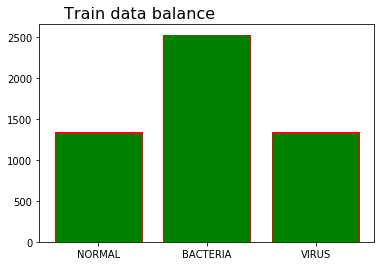

In [24]:
normal_count = (len(os.listdir(train_normal_dir)))
bacteria_count = (len(os.listdir(train_bacteria_dir)))
virus_count = (len(os.listdir(train_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Train data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

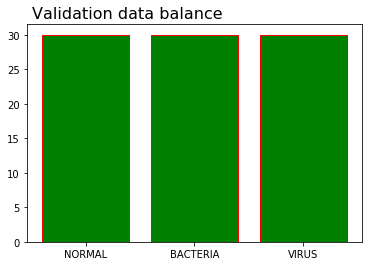

In [25]:
normal_count = (len(os.listdir(validation_normal_dir)))
bacteria_count = (len(os.listdir(validation_bacteria_dir)))
virus_count = (len(os.listdir(validation_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Validation data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

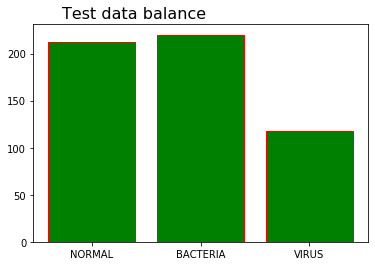

In [26]:
normal_count = (len(os.listdir(test_normal_dir)))
bacteria_count = (len(os.listdir(test_bacteria_dir)))
virus_count = (len(os.listdir(test_virus_dir)))

plt.figure()
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Test data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

EXAMPLE IMAGES OF EACH CATEGORY 

NORMAL


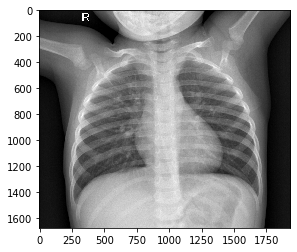

In [27]:
img_normal = 'IM-0243-0001.jpeg'
img_normal = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + img_normal)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

BACTERIA


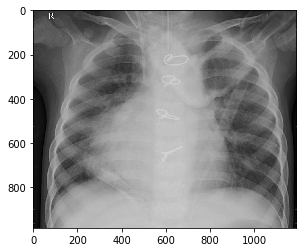

In [28]:
img_bacteria='person55_bacteria_262.jpeg'
img_bacteria=load_img('/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + img_bacteria)

print('BACTERIA')
plt.imshow(img_bacteria)
plt.show()

VIRUS


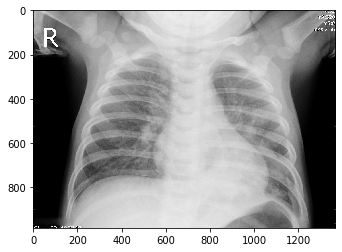

In [29]:
img_virus = 'person151_virus_301.jpeg'
img_virus = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + img_virus)

print('VIRUS')
plt.imshow(img_virus)
plt.show()

DATA PREPROCESSING WITHOUT AUGMENTATION

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


BUILDING CNN MODEL

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

COMPILING MODEL AND SETTING UP CALLBACKS

In [33]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [34]:
mc = ModelCheckpoint('best_model_history.h5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=True,
                     verbose=1)
cb_list = [mc]

MODEL FITTING 

In [68]:
history = model.fit_generator(
train_generator,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator,
validation_steps=100,
shuffle=True,
callbacks=cb_list)

Epoch 1/10
160/160 [==============================] - 185s 1s/step - loss: 0.5155 - acc: 0.7783 - val_loss: 0.7157 - val_acc: 0.7009

Epoch 00001: val_acc did not improve from 0.76516
Epoch 2/10
160/160 [==============================] - 182s 1s/step - loss: 0.4548 - acc: 0.8035 - val_loss: 0.9176 - val_acc: 0.7222

Epoch 00002: val_acc did not improve from 0.76516
Epoch 3/10
160/160 [==============================] - 180s 1s/step - loss: 0.4337 - acc: 0.8189 - val_loss: 1.0356 - val_acc: 0.7103

Epoch 00003: val_acc did not improve from 0.76516
Epoch 4/10
160/160 [==============================] - 180s 1s/step - loss: 0.4122 - acc: 0.8211 - val_loss: 1.6665 - val_acc: 0.7332

Epoch 00004: val_acc did not improve from 0.76516
Epoch 5/10
160/160 [==============================] - 179s 1s/step - loss: 0.3982 - acc: 0.8293 - val_loss: 1.3922 - val_acc: 0.7672

Epoch 00005: val_acc improved from 0.76516 to 0.76716, saving model to best_model_history.h5
Epoch 6/10
160/160 [=================

SAVING AND EVALUATING ONLY THE BEST MODEL

In [77]:
saved_model = load_model('best_model_history.h5')

In [70]:
test_loss, test_accuracy = saved_model.evaluate(test_generator, steps=50)

50/50 [==============================] - 23s 462ms/step


In [78]:
print('Test loss: %4.2f' % (test_loss))
print('Test accuracy: %4.2f' % (test_accuracy))

Test loss: 0.72
Test accuracy: 0.74


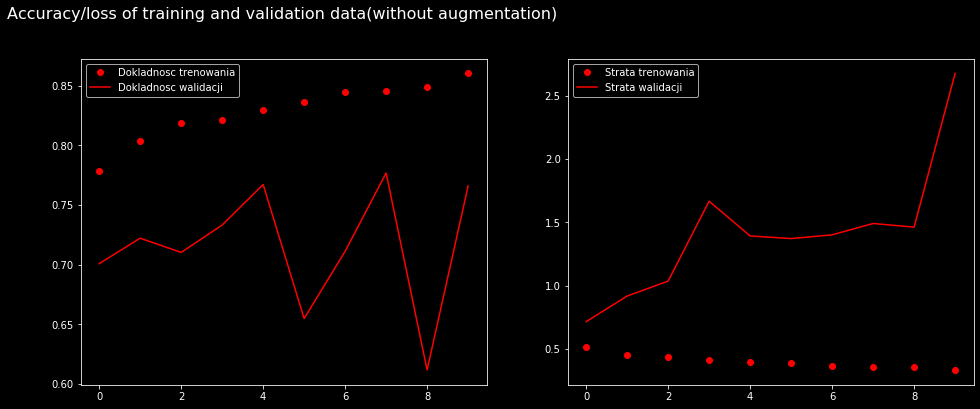

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'ro', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokladnosc walidacji')
plt.legend()

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'ro', label='Strata trenowania')
plt.plot(epochs, val_loss, 'r', label='Strata walidacji')
plt.legend()

plt.suptitle(t = 'Accuracy/loss of training and validation data(without augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

EXAMPLE OF AUGMENTED IMAGE 

In [43]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

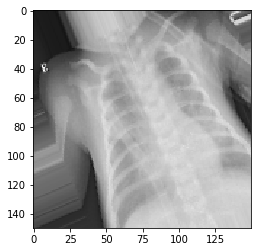

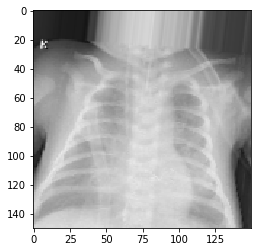

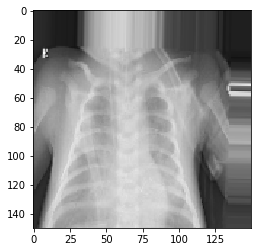

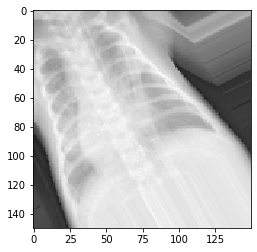

In [44]:
fnames = [os.path.join(train_bacteria_dir, fname) for fname in os.listdir(train_bacteria_dir)]
img_path = fnames[2]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

DATA PREPROCESSING WITH AUGMENTATION

In [50]:
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen_aug = ImageDataGenerator(rescale = 1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator_aug = test_datagen_aug.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

test_generator_aug = test_datagen_aug.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


SETTING UP CALLBACKS 

In [51]:
mc = ModelCheckpoint('best_model_history_aug.h5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=True,
                     verbose=1)
cb_list_aug = [mc]

MODEL FITTING WTIH AUGMENTATION APPLIED

In [52]:
history_aug = model.fit_generator(
train_generator_aug,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator_aug,
validation_steps=100,
shuffle=True,
callbacks=cb_list_aug)

Epoch 1/10
160/160 [==============================] - 222s 1s/step - loss: 0.9074 - acc: 0.5895 - val_loss: 0.6585 - val_acc: 0.6006

Epoch 00001: val_acc improved from -inf to 0.60060, saving model to best_model_history_aug.h5
Epoch 2/10
160/160 [==============================] - 209s 1s/step - loss: 0.8069 - acc: 0.6365 - val_loss: 0.7335 - val_acc: 0.5873

Epoch 00002: val_acc did not improve from 0.60060
Epoch 3/10
160/160 [==============================] - 206s 1s/step - loss: 0.7555 - acc: 0.6637 - val_loss: 0.8779 - val_acc: 0.5010

Epoch 00003: val_acc did not improve from 0.60060
Epoch 4/10
160/160 [==============================] - 206s 1s/step - loss: 0.7293 - acc: 0.6895 - val_loss: 0.5501 - val_acc: 0.8001

Epoch 00004: val_acc improved from 0.60060 to 0.80013, saving model to best_model_history_aug.h5
Epoch 5/10
160/160 [==============================] - 205s 1s/step - loss: 0.7148 - acc: 0.6828 - val_loss: 0.6713 - val_acc: 0.7445

Epoch 00005: val_acc did not improve fr

SAVING AND EVALUATING ONLY BEST MODEL

In [79]:
saved_model_aug = load_model('best_model_history_aug.h5')

In [83]:
test_loss_aug, test_accuracy_aug = saved_model_aug.evaluate(test_generator_aug, steps=50)

50/50 [==============================] - 28s 564ms/step


In [84]:
print('Test loss: %4.2f' % (test_loss_aug))
print('Test accuracy: %4.2f' % (test_accuracy_aug))

Test loss: 0.52
Test accuracy: 0.84


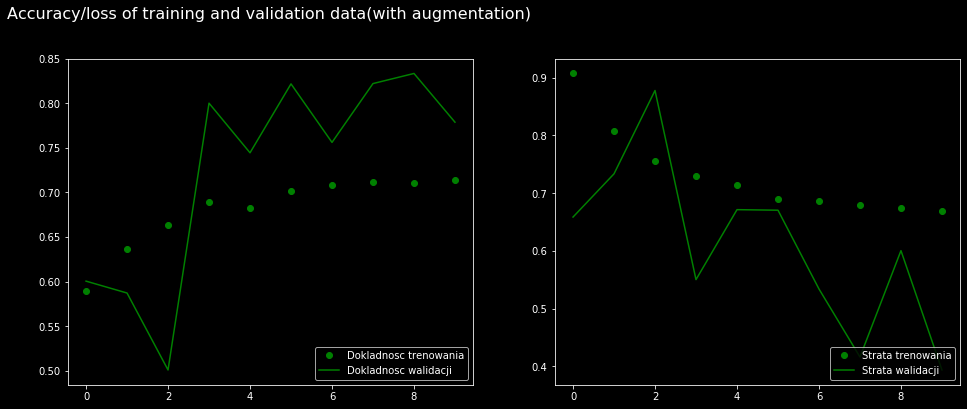

In [85]:
acc = history_aug.history['acc']
val_acc = history_aug.history['val_acc']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'go', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.legend(loc="lower right")

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'go', label='Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.legend(loc='lower right')

plt.suptitle(t = 'Accuracy/loss of training and validation data(with augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

COMPARISON OF MODELS WITH AND WITHOUT DATA AUGMENTATION APPLIED

In [86]:
print('Test loss: %4.2f' % (test_loss))
print('Test loss (Augmentation): %4.2f' % (test_loss_aug))

Test loss: 0.72
Test loss (Augmentation): 0.52


In [87]:
print('Test accuracy: %4.2f' % (test_accuracy))
print('Test accuracy (Augmentation: %4.2f' % (test_accuracy_aug))

Test accuracy: 0.74
Test accuracy (Augmentation: 0.84


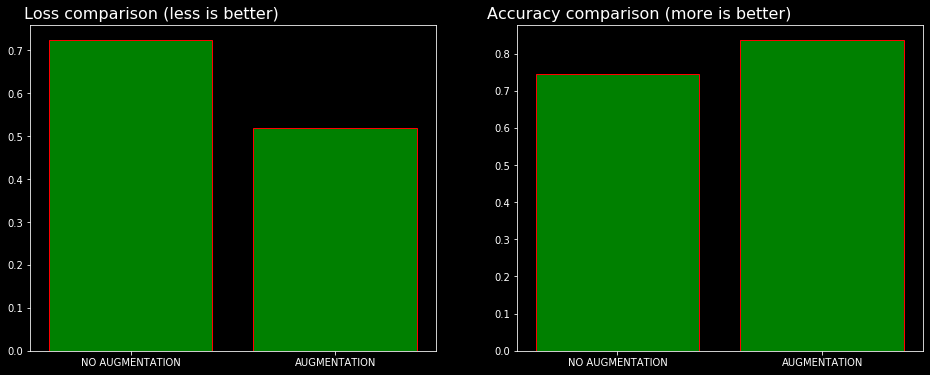

In [88]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('NO AUGMENTATION', 'AUGMENTATION')
height = [test_loss, test_loss_aug]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Loss comparison (less is better)', x = 0.3, y = 1,fontsize = 16)

plt.subplot(122)
bars = ('NO AUGMENTATION', 'AUGMENTATION')
height = [test_accuracy, test_accuracy_aug]
plt.bar(np.arange(len(bars)), height, color='g', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Accuracy comparison (more is better)', x = 0.3, y = 1,fontsize = 16)
plt.show()